# view history and plots
pulls up and displays the history file for bronx and canopy comparision, in the form of a dataframe. Mostly exists as a double checking method

In [1]:
 import numpy as np
# import pandas. optional but helpful 'display.max_columns' arg shows all DataFrame columns when printing
print('importing pandas')
import pandas
from pandas import DataFrame
import pickle   #to load in metrics history
pandas.set_option('display.max_columns', None)
# import matplot for better plotting functions
import sys
sys.path.insert(0,'/home/Avery.Kiihne/pip_experiment')
import matplotlib.pyplot as plt
from sklearn import preprocessing   #for normalization

importing pandas


In [2]:
#Only change the chosen_name variable. Everything will change to that variable.
chosen_name = 'Ian.Laflotte' #options: Ian.Laflotte

#pull data from file and display as dataframe table
filename = 'user_hist_storage_folder/'+chosen_name+'_history_DO_NOT_DELETE.pkl'
# Read dictionary pkl file
with open(filename, 'rb') as fp:
    metrics_history = pickle.load(fp)
metrics_df = DataFrame.from_dict(metrics_history,orient='index',)
metrics_df

,0
num_procs,2611.44
num_procs_error,264.874
rssmax,1.24309e+07
rssmax_error,1.17986e+06
read_bytes,6.42339e+07
read_bytes_error,1.11635e+07
duration,6.66974e+07
duration_error,6.09883e+06
cpu_time,3.06792e+07
cpu_time_error,3.09516e+06


# Plots
Below are plots of esm4.2 data collected so far

Text(0.5, 1.0, '# of bronx Jobs Per Day')

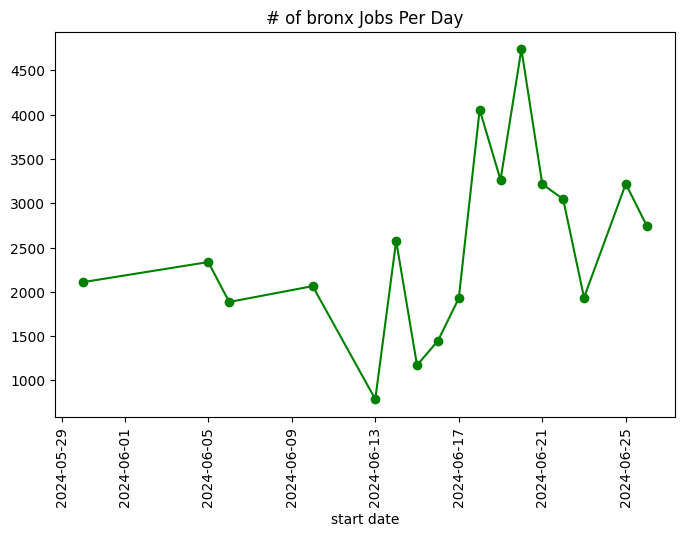

In [7]:
#first create the plot of number of esm4.2 jobs
plt.style.use('default')
plt.figure(figsize=(8,5))
date_time =metrics_history['date']
date_time = pandas.to_datetime(date_time)
df = pandas.DataFrame()
df['value'] = metrics_history['num_jobs']
df = df.set_index(date_time)
df = df.sort_index(ascending=True)
plt.plot(df.index,df['value'], color = 'g')
plt.scatter(df.index,df['value'], color = 'g')
plt.xticks(rotation=90)
plt.xlabel('start date')
plt.title('# of '+chosen_name+' Jobs Per Day')

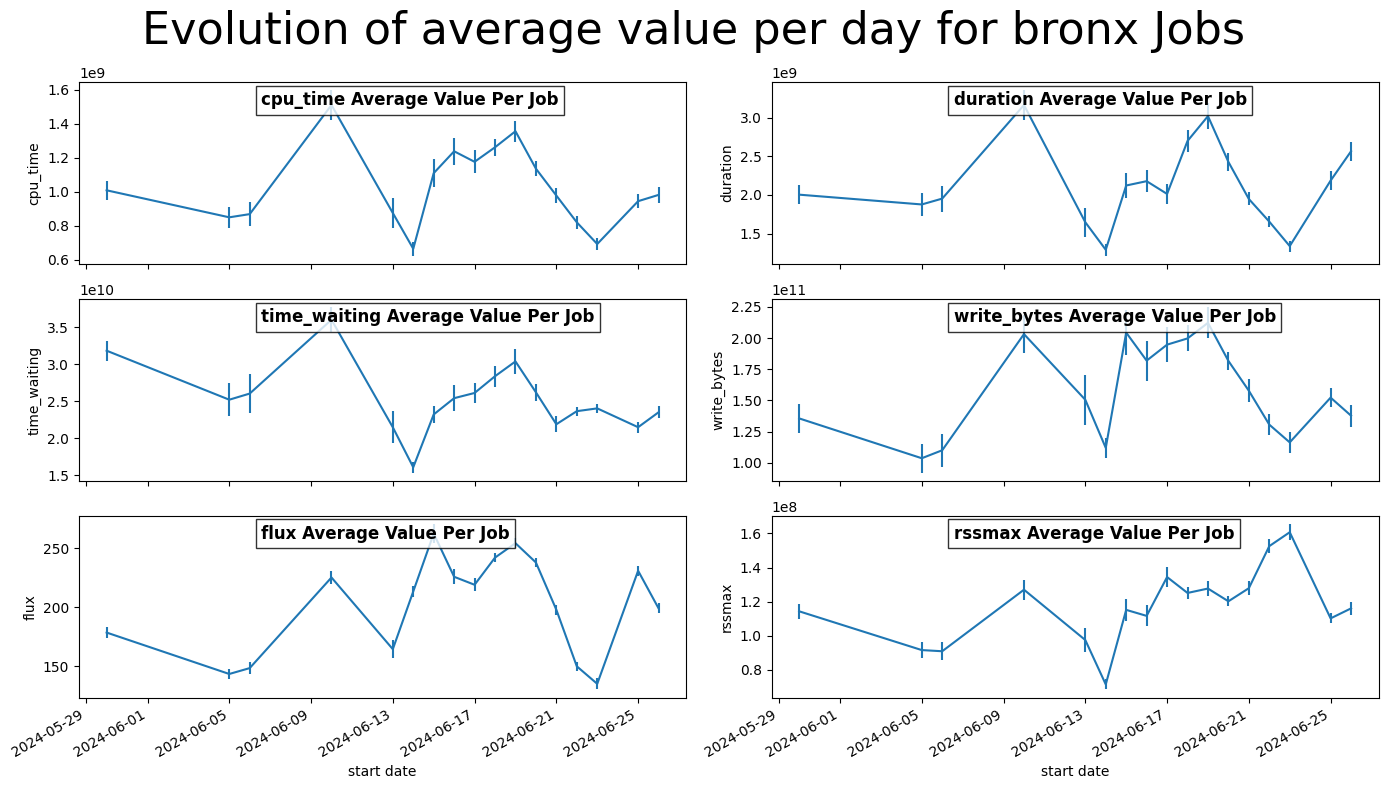

In [9]:
#create a multipanel plot with a shared x-axis of dates
#setup
plt.style.use('default')
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(14,8), sharex = True)
ax =ax.ravel() 
#now cycle through chose variables for plotting information
metrics_list = ['cpu_time', 'duration','time_waiting','write_bytes','flux','rssmax']
for aa in range(6):
    date_time =metrics_history['date']
    date_time = pandas.to_datetime(date_time)
    df = pandas.DataFrame()
    df['value'] = metrics_history[metrics_list[aa]]
    df['value_error'] = metrics_history[metrics_list[aa]+'_error']
    df = df.set_index(date_time)
    df = df.sort_index(ascending=True)
    ax[aa].errorbar(df.index,df['value'], yerr = df['value_error'])
    ax[aa].set_ylabel(metrics_list[aa])
    ax[aa].annotate(metrics_list[aa]+' Average Value Per Job', xy=(0.3, 0.9), xycoords="axes fraction",color = 'black', fontsize =12, weight = 'bold',horizontalalignment='left',verticalalignment='center', bbox=dict(facecolor='white', alpha=0.8))    
plt.gcf().autofmt_xdate()
plt.suptitle('Evolution of average value per day for '+chosen_name+' Jobs', fontsize = 32)
ax[5].set_xlabel('start date')
ax[4].set_xlabel('start date')
plt.tight_layout()
plt.show()

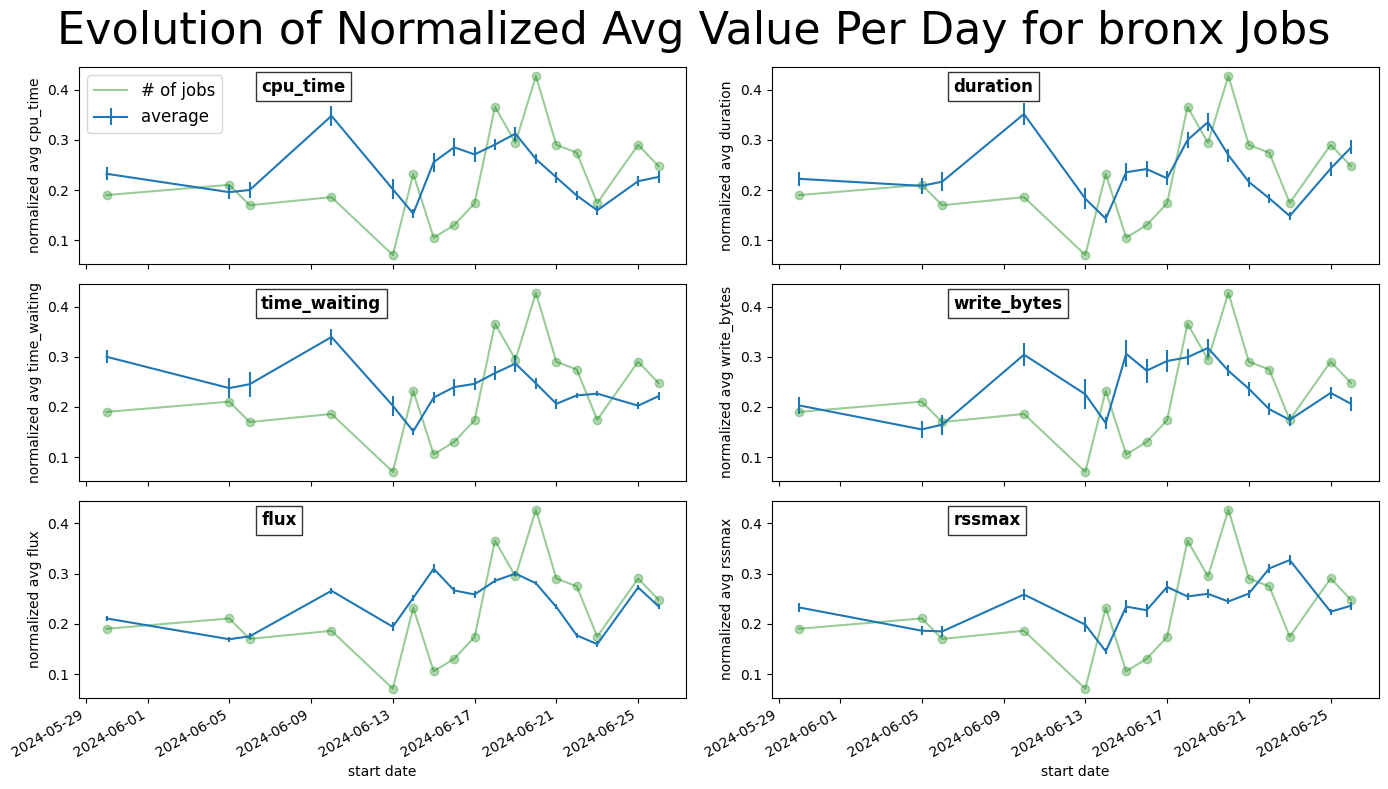

In [10]:
#create a multipanel plot with a shared x-axis of dates
#setup
plt.style.use('default')
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(14,8), sharex = True)
ax =ax.ravel() 
#now cycle through chose variables for plotting information
metrics_list = ['cpu_time', 'duration','time_waiting','write_bytes','flux','rssmax']
for aa in range(6):
    date_time =metrics_history['date']
    date_time = pandas.to_datetime(date_time)
    df = pandas.DataFrame()
    df['value'] = metrics_history[metrics_list[aa]]
    df['value_error'] = metrics_history[metrics_list[aa]+'_error']
    df = df.set_index(date_time)
    df = df.sort_index(ascending=True)
    normalized_y = preprocessing.normalize([df['value']])  #normalize using sklearn
    #adjust error by multiplying error by the same factor as each point
    for bb in range(len(normalized_y[0])):
        df['value_error'][bb]= df['value_error'][bb]*(normalized_y[0][bb]/df['value'][bb])
    ax[aa].errorbar(df.index,normalized_y[0], yerr = df['value_error'], label ='average')
    ax[aa].set_ylabel('normalized avg ' + metrics_list[aa])
    ax[aa].annotate(metrics_list[aa], xy=(0.3, 0.9), xycoords="axes fraction",color = 'black', fontsize =12, weight = 'bold',horizontalalignment='left',verticalalignment='center', bbox=dict(facecolor='white', alpha=0.8))
    #now add a normalized version of job# plot to each subplot

    date_time =metrics_history['date']
    date_time = pandas.to_datetime(date_time)
    df_job_num = pandas.DataFrame()
    df_job_num['value'] = metrics_history['num_jobs']
    df_job_num = df_job_num.set_index(date_time)
    df_job_num = df_job_num.sort_index(ascending=True)
    normalized_y_job_num = preprocessing.normalize([df_job_num['value']])  #normalize using sklearn
    ax[aa].plot(df.index,normalized_y_job_num[0], color = 'g', alpha = .4, label ='# of jobs')
    ax[aa].scatter(df.index,normalized_y_job_num[0], color = 'g', alpha = .3)
plt.gcf().autofmt_xdate()
#legend is set by 'label' in earlier plotting commands
ax[0].legend(loc = 'upper left',fontsize = 12)
plt.suptitle('Evolution of Normalized Avg Value Per Day for '+chosen_name+' Jobs', fontsize = 32)
ax[5].set_xlabel('start date')
ax[4].set_xlabel('start date')
plt.tight_layout()
plt.show()

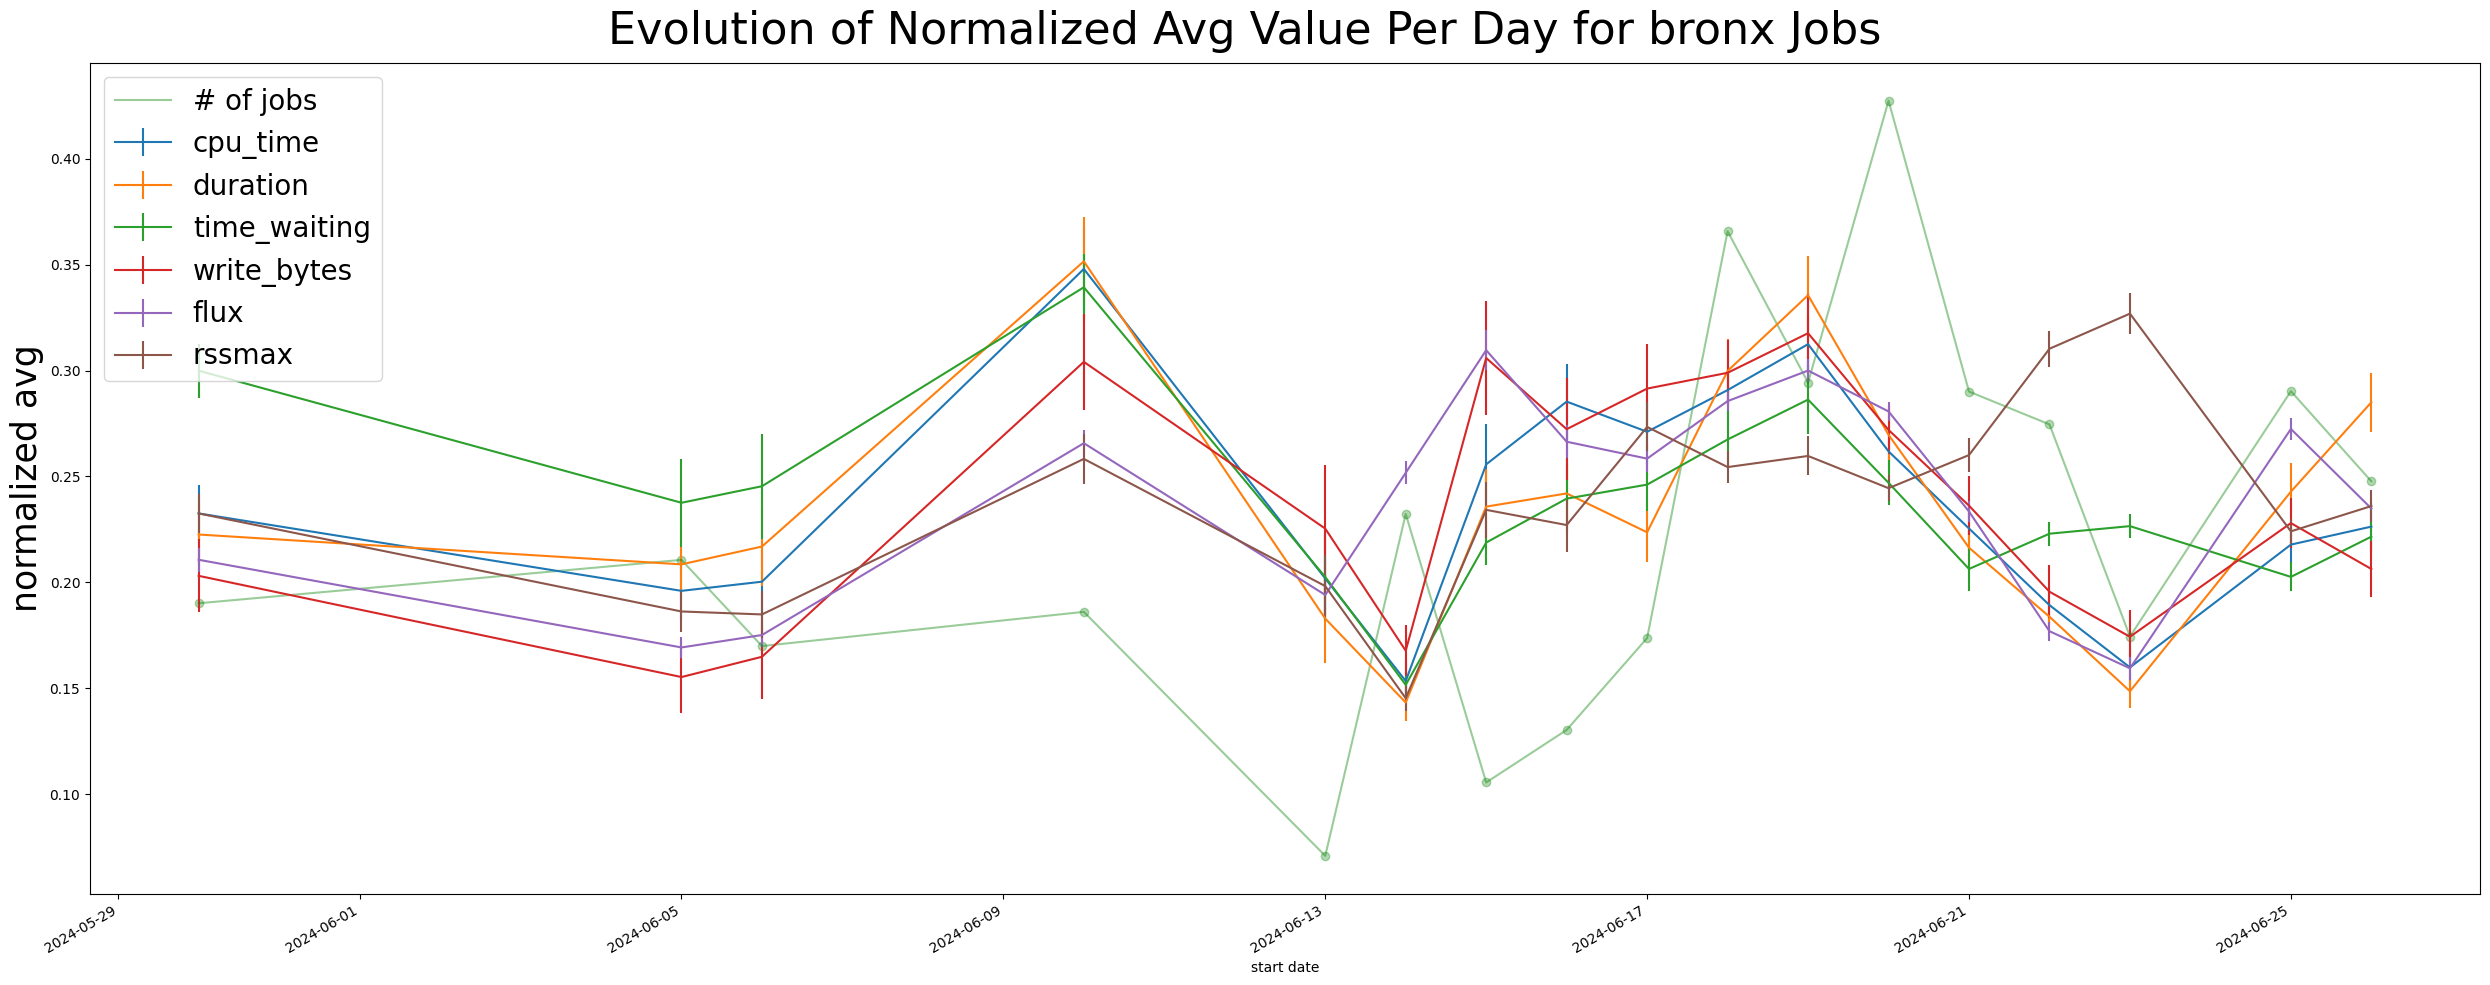

In [11]:
#create a multipanel plot with a shared x-axis of dates
#setup
plt.style.use('default')
plt.figure(figsize=(25,10))
#now cycle through chose variables for plotting information
metrics_list = ['cpu_time', 'duration','time_waiting','write_bytes','flux','rssmax']
for aa in range(6):
    date_time =metrics_history['date']
    date_time = pandas.to_datetime(date_time)
    df = pandas.DataFrame()
    df['value'] = metrics_history[metrics_list[aa]]
    df['value_error'] = metrics_history[metrics_list[aa]+'_error']
    df = df.set_index(date_time)
    df = df.sort_index(ascending=True)
    normalized_y = preprocessing.normalize([df['value']])  #normalize using sklearn
    #adjust error by multiplying error by the same factor as each point
    for bb in range(len(normalized_y[0])):
        df['value_error'][bb]= df['value_error'][bb]*(normalized_y[0][bb]/df['value'][bb])
    plt.errorbar(df.index,normalized_y[0], yerr = df['value_error'], label =metrics_list[aa])
#now add a normalized version of job# plot to each subplot
date_time =metrics_history['date']
date_time = pandas.to_datetime(date_time)
df_job_num = pandas.DataFrame()
df_job_num['value'] = metrics_history['num_jobs']
df_job_num = df_job_num.set_index(date_time)
df_job_num = df_job_num.sort_index(ascending=True)
normalized_y_job_num = preprocessing.normalize([df_job_num['value']])  #normalize using sklearn
plt.plot(df.index,normalized_y_job_num[0], color = 'g', alpha = .4, label ='# of jobs')
plt.scatter(df.index,normalized_y_job_num[0], color = 'g', alpha = .3)
plt.gcf().autofmt_xdate()
#legend is set by 'label' in earlier plotting commands
plt.legend(loc = 'upper left',fontsize = 20)
plt.ylabel('normalized avg',fontsize = 25)
plt.xlabel('start date')
plt.suptitle('Evolution of Normalized Avg Value Per Day for '+chosen_name+' Jobs', fontsize = 32)
plt.tight_layout()
plt.show()